In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm_notebook
from sklearn.preprocessing import PolynomialFeatures

class PocketPerceptron:
    
    def __init__(self, degree=None):
        self.w = None
        self.best_w = None
        self.best_score = None
        self.degree = degree
        
    def accuracy(self, labels, preds):
        return np.mean(labels == preds)
    
    def forward(self, data):
        return np.sign(data @ self.w)
    
    def fit(self, data, labels, n_epochs=10, mod=True):
        if mod:
            data = np.concatenate([np.full(data.shape[0], -1).reshape(-1, 1),
                                  data], axis=1)
        
        self.w = 0.001 * np.random.random(data.shape[1])
        self.best_w = np.copy(self.w)
        self.best_score = self.accuracy(labels, self.predict(data, mod=False))
        
        for _ in tqdm_notebook(range(n_epochs)):
            for row, label in zip(data, labels):
                pred = self.forward(row)
                if pred != label:
                    
                    self.w += label * row

                    preds = self.forward(data)
                    score = self.accuracy(labels, preds)
                    if score > self.best_score:
                        self.best_w = np.copy(self.w)
                        self.best_score = score
            
    def predict(self, data, mod=True, activate=True):
        if mod:
            data = np.concatenate([np.full(data.shape[0], -1).reshape(-1, 1),
                                  data], axis=1)
        if activate:
            return np.sign(data @ self.best_w)
        else:
            return data @ self.best_w
    
    def decision_boundary(self, data, labels, n=1000):
        x_min, x_max = np.min(data[:,0]), np.max(data[:,0])
        y_min, y_max = np.min(data[:,1]), np.max(data[:,1])
        xx, yy = np.meshgrid(np.linspace(x_min, x_max, n),
                             np.linspace(y_min, y_max, n))
        
        arr = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)
        
        if self.degree:
            vals = self.predict_poly(arr, activate=False).reshape(xx.shape)
        else:
            vals = self.predict(arr, activate=False).reshape(xx.shape)
    
        fig, ax = plt.subplots(figsize = [10, 10])
        ax.scatter(data[:, 0], data[:, 1], c=labels)
        ax.contour(xx, yy, vals, levels=[0], colors=['red'], 
                   linewidths=3, linestyles=['--'])
        
    def fit_poly(self, data, labels, mod=True, n_epochs=10):
        if not self.degree:
            raise ValueError('Model was not specified as polynomial')
            
        self.poly = PolynomialFeatures(self.degree, include_bias=False)
        poly_data = self.poly.fit_transform(data)
        self.fit(poly_data, labels, mod=mod, n_epochs=n_epochs)
    
    def predict_poly(self, data, mod=True, activate=True):
        if not self.degree:
            raise ValueError('Model was not specified as polynomial')

        if mod:
            data = self.poly.fit_transform(data)
            data = np.concatenate([np.full(data.shape[0], -1).reshape(-1, 1),
                                           data], axis=1)
        
        if activate:
            return np.sign(data @ self.best_w)
        else:
            return data @ self.best_w 

## Linear features:

In [3]:
df = pd.read_csv('Data/blobs2.csv')

In [4]:
num_data = df.drop(columns='label').values
labels = np.array([1 if l>0 else -1 for l in df['label'].values])

In [291]:
model = PocketPerceptron()
model.fit(num_data, labels)

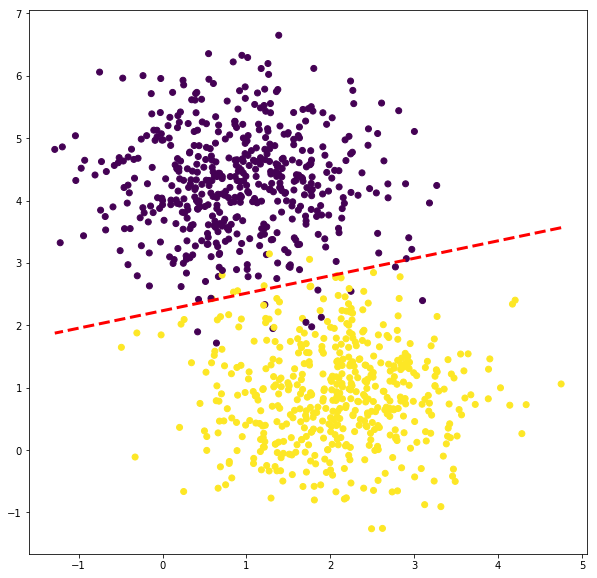

In [292]:
model.decision_boundary(num_data, labels)

## Polynomial features

### Degree 2:

In [302]:
model_poly2 = PocketPerceptron(degree=2)
model_poly2.fit_poly(num_data, labels, n_epochs=100)

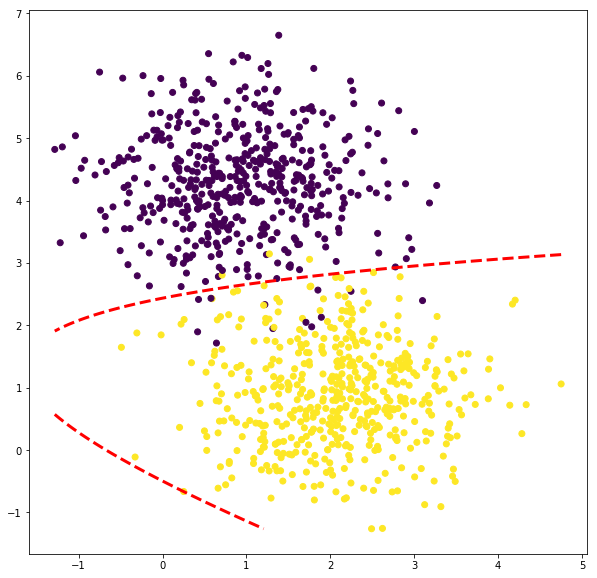

In [303]:
model_poly2.decision_boundary(num_data, labels)

### Degree 3:

In [304]:
model_poly3 = PocketPerceptron(degree=3)
model_poly3.fit_poly(num_data, labels, n_epochs=100)

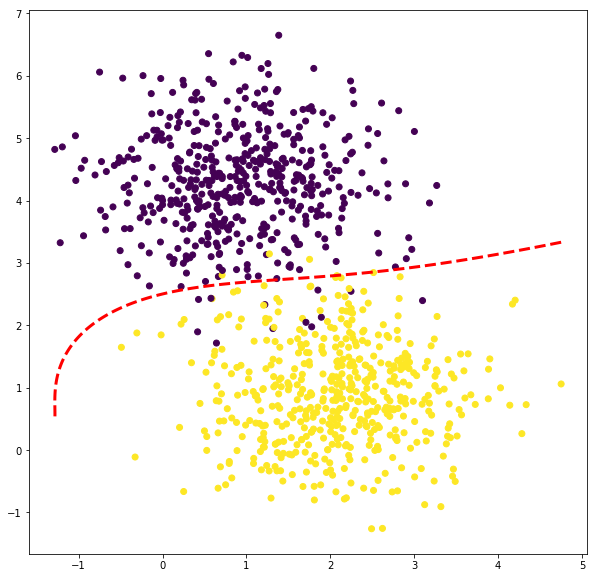

In [305]:
model_poly3.decision_boundary(num_data, labels)

### Degree 4:

In [306]:
model_poly4 = PocketPerceptron(degree=4)
model_poly4.fit_poly(num_data, labels, n_epochs=100)

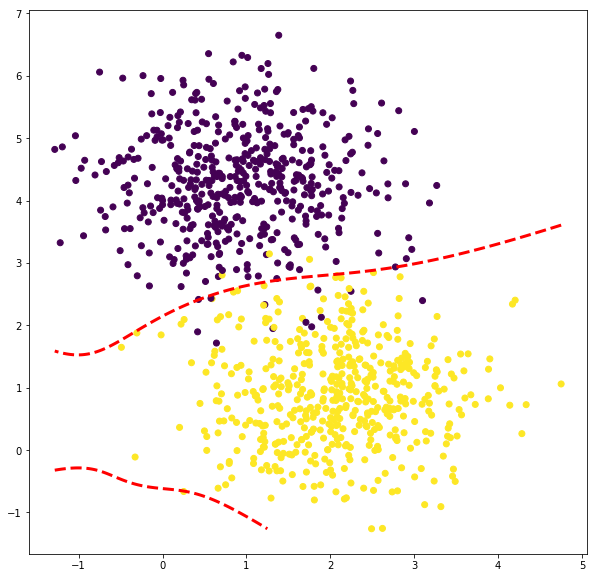

In [307]:
model_poly4.decision_boundary(num_data, labels)

### Degree 30:

Just curious to see how hard it will overfit:

In [11]:
model_poly30 = PocketPerceptron(degree=30)
model_poly30.fit_poly(num_data, labels, n_epochs=10000)

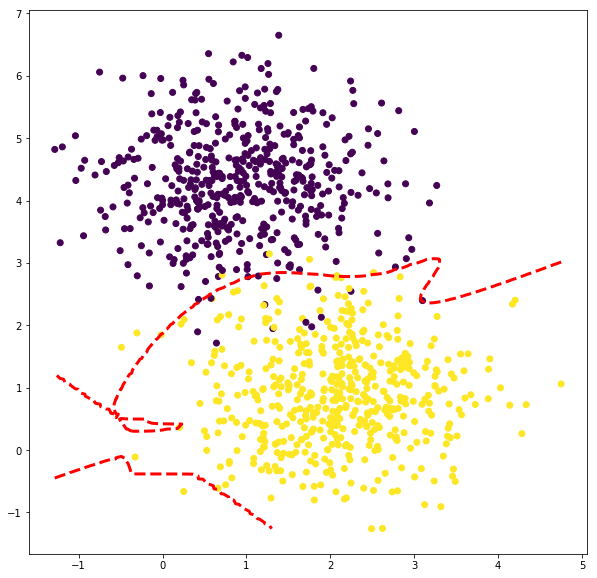

In [12]:
model_poly30.decision_boundary(num_data, labels, n=100)